In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/pinetree.csv')
df.head()

,pine_population,beetle_density
0,896.106591,0.090259
1,884.237630,0.223759
2,830.827303,0.311749
3,860.499707,0.796264
4,961.385880,0.543835


# Normalidad de los residuos

In [3]:
import statsmodels.formula.api as smf
#instantiation
reg = smf.ols('pine_population ~ beetle_density', data = df)
#members of reg object
print(dir(reg))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data_attr', '_df_model', '_df_resid', '_fit_collinear', '_fit_ridge', '_fit_zeros', '_get_init_kwds', '_handle_data', '_init_keys', '_setup_score_hess', '_sqrt_lasso', 'data', 'df_model', 'df_resid', 'endog', 'endog_names', 'exog', 'exog_names', 'fit', 'fit_regularized', 'formula', 'from_formula', 'get_distribution', 'hessian', 'hessian_factor', 'information', 'initialize', 'k_constant', 'loglike', 'nobs', 'predict', 'rank', 'score', 'weights', 'wendog', 'wexog', 'whiten']


In [4]:
res = reg.fit()

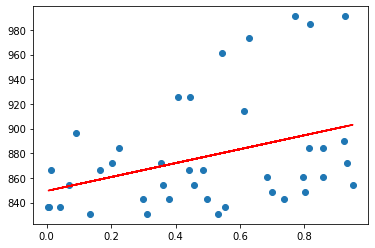

In [5]:
plt.scatter(df.beetle_density, df.pine_population)
plt.plot(df.beetle_density, res.fittedvalues, color='red')
plt.show()

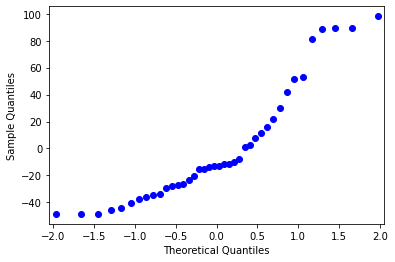

In [12]:
import statsmodels.api as sm
sm.qqplot(res.resid);

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 7.95111641042829e-05
Residuals are not normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.00022804056061431766
Residuals are not normally distributed


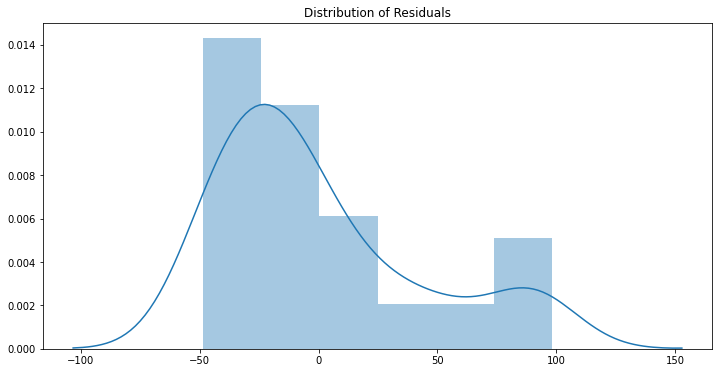


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [13]:
    print('Assumption: The error terms are normally distributed', '\n')
    
    p_value_thresh=0.05
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(res.resid)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed', '\n')
    else:
        print('Residuals are normally distributed', '\n')
    
    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test = shapiro(res.resid)
    shapiro_test_stat=shapiro_test[0]
    shapiro_test_pvalue=shapiro_test[1]
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
    # Reporting the normality of the residuals
    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(res.resid)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

In [14]:
corr, p = stats.spearmanr(df.pine_population, df.beetle_density)

print('Correlation=%.3f, p=%.3f' % (corr, p))
# interpretación
alpha = 0.05
if p > alpha:
	print('No rechazamos H0: Correlación no significativa.')
else:
	print('Rechazamos H0: Correlación significativa.')

Correlation=0.367, p=0.020
Rechazamos H0: Correlación significativa.
